[목차]
1. 태스크 정의
2. 모델 및 성능 평가 지표 선정
3. 데이터 탐색
4. 데이터 전처리
5. 학습 및 성능 평가
6. 성능 향상을 위한 시도
7. 최종 결과

# 태스크 정의
워싱턴 D.C의 Bike Sharing 데이터를 활용해서 자전거 대여량을 예측한다.

# 모델 및 성능 평가 지표 선정
과제 실습을 통해 Data Engineer 과정을 복습하는 데 목적이 있으므로, 학습한 데이터 분석 방법 및 모델을 다양하게 적용한다.

- 랜덤포레스트
- kNN
- 선형 회귀
- ...

Bike Sharing 데이터의 수치형 Target 데이터(자전거 대여량)가 있으므로, 성능 평가 지표는 MSE로 한다.

# 데이터 탐색

데이터는 kaggle에서 구할 수 있다(https://www.kaggle.com/c/bike-sharing-demand/).

train 데이터와 test 데이터가 나눠져서 제공된다. test 데이터에는 Target 데이터가 빠져 있으며, Target 데이터를 채워서 kaggle에 제출하면 score를 확인할 수 있다.  
약 2년 간의 1시간 단위 데이터가 train 데이터로 제공된다.

|column|의미|
|----|----|
|datetime|시간. 연-월-일 시:분:초|
|season|계절. 봄(1), 여름(2), 가을(3), 겨울(4)|
|holiday|공휴일 여부. 공휴일(1), 공휴일 아님(0)|
|workingday|근무일 여부. 근무일(1), 근무일 아님(0)|
|weather|날씨. 깨끗한 날씨 or 약간의 구름(1), 구름 or 약간의 안개(2), 약간의 눈/비 or 천둥(3), 우박 or 많은 비(4)|
|temp|섭씨 온도|
|atemp|체감 섭씨 온도|
|humidity|습도|
|windspeed|풍속|
|casual|비회원의 자전거 대여량|
|registered|회원의 자전거 대여량|
|count|총 자전거 대여량|

# 데이터 전처리

In [5]:
import pandas as pd

train = pd.read_csv('./data/bike_sharing_demand/train.csv', parse_dates=['datetime'])

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
test = pd.read_csv('./data/bike_sharing_demand/test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [16]:
# feature에 연도, 시간, 요일을 넣기 위해서 datetime 전처리
train['datetime-year'] = train['datetime'].dt.year
train['datetime-hour'] = train['datetime'].dt.hour
# 월(0), 화(1), 수(2), 목(3), 금(4), 토(5), 일(6)
train['datetime-dayofweek'] = train['datetime'].dt.dayofweek

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-hour,datetime-dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,4,5


In [15]:
# teset 데이터에도 feature에 연도, 시간, 요일을 넣기 위해서 datetime 전처리
test['datetime-year'] = test['datetime'].dt.year
test['datetime-hour'] = test['datetime'].dt.hour
# 월(0), 화(1), 수(2), 목(3), 금(4), 토(5), 일(6)
test['datetime-dayofweek'] = test['datetime'].dt.dayofweek

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


# 학습 및 성능 평가

In [41]:
# 모델 학습에 필요한 feature 선정
feature_columns = [
    "season",
    "holiday",
    "workingday",
    "weather",
    "temp",
    "atemp",
    "humidity",
    "windspeed",
    "datetime-year",
    "datetime-hour",
    "datetime-dayofweek"
]

In [42]:
# 모델 예측 대상 설정
target_column = 'count'

In [19]:
X_train = train[feature_columns]
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [20]:
X_test = test[feature_columns]
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [21]:
y_train = train[target_column]
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

## 랜덤포레스트

In [86]:
# 랜덤포레스트 모델 생성
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model

RandomForestRegressor()

In [87]:
# 랜덤포레스트 모델 교차 검증
# kaggle에서는 Bike Sharing Demand에 대해 RMSLE(Root Mean Squared Logarithmic Error) 방식을 사용한다.
# RMSLE 점수는 kaggle에 제출하면 얻을 수 있다.
# 과제에서는 모델 간의 대략적인 비교만을 위해 기본적인 scoring 공식을 사용하였다.
from sklearn.model_selection import cross_val_score

score = cross_val_score(model,
                        X_train,
                        y_train,
                        cv=20).mean()
score

0.8752938649112283

In [32]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
predictions = model.predict(X_test)
predictions

array([ 10.86,   5.12,   4.39, ..., 102.61, 101.42,  47.25])

In [38]:
# kaggle 제출용 template
submission = pd.read_csv('./data/bike_sharing_demand/sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [39]:
submission['count'] = predictions
submission.head()

,datetime,count
0,2011-01-20 00:00:00,10.86
1,2011-01-20 01:00:00,5.12
2,2011-01-20 02:00:00,4.39
3,2011-01-20 03:00:00,3.58
4,2011-01-20 04:00:00,2.90


In [40]:
submission.to_csv('./data/bike_sharing_demand/random-forest_0.csv', index=False)

### kaggle 제출 결과
RMSLE 공식으로 측정하므로 0에 가까울 수록 성능이 좋다

![image.png](./images/random-forest_0.png)

## kNN

In [45]:
# kNN 모델 생성
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model

KNeighborsRegressor()

In [46]:
# 랜덤포레스트 모델보다 점수가 낮아서, kaggle 결과도 안좋을 것으로 예상된다.
score =cross_val_score(model,
                       X_train,
                       y_train,
                       cv=20).mean()
score

0.1412418300814157

In [47]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([ 19. ,  20. ,  15.4, ...,  73.6, 105.6,  61.4])

In [48]:
# kaggle 제출용 template
submission = pd.read_csv('./data/bike_sharing_demand/sampleSubmission.csv')
submission['count'] = predictions
submission.head()

,datetime,count
0,2011-01-20 00:00:00,19.0
1,2011-01-20 01:00:00,20.0
2,2011-01-20 02:00:00,15.4
3,2011-01-20 03:00:00,14.4
4,2011-01-20 04:00:00,14.2


In [49]:
submission.to_csv('./data/bike_sharing_demand/kNN_0.csv', index=False)

### kaggle 제출 결과
RMSLE 공식으로 측정하므로 0에 가까울 수록 성능이 좋다

![image.png](./images/kNN_0.png)

## 선형 회귀

In [51]:
# 선형 회귀 모델 생성
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression()

In [54]:
# kNN보다 더 점수가 낮다
score =cross_val_score(model,
                       X_train,
                       y_train,
                       cv=20).mean()
score

0.12388279311614711

In [55]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([-23.27179232, -20.84936197, -13.04580719, ..., 209.84495832,
       227.95174821, 217.86201958])

In [56]:
# kaggle 제출용 template
submission = pd.read_csv('./data/bike_sharing_demand/sampleSubmission.csv')
submission['count'] = predictions
submission.head()

,datetime,count
0,2011-01-20 00:00:00,-23.271792
1,2011-01-20 01:00:00,-20.849362
2,2011-01-20 02:00:00,-13.045807
3,2011-01-20 03:00:00,-1.986454
4,2011-01-20 04:00:00,5.817101


In [57]:
submission.to_csv('./data/bike_sharing_demand/linear-regression_0.csv', index=False)

### kaggle 제출 결과
RMSLE 공식으로 측정하므로 0에 가까울 수록 성능이 좋다

![image.png](./images/linear-regression_0.png)

음수로 예측해서 kaggle 점수 측정 오류가 났다

# 성능 향상을 위한 시도
성능 향상을 위해 시도한 내용과 그에 따른 성능 측정 결과

## 수치형 데이터 정규화

In [70]:
# Z점수 표준화 함수
def zscore_standize(arr):
    return (arr - arr.mean()) / (arr.std())

<AxesSubplot:>

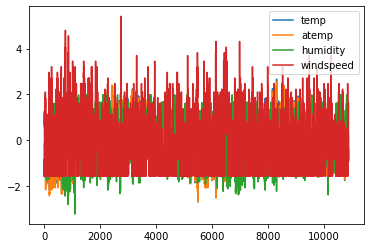

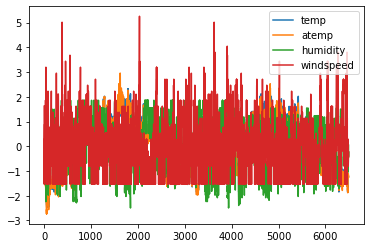

In [72]:
# 수치형 데이터 temp, atemp, humidity, windspeed 정규화 column 추가
X_train_standized = X_train.copy()
X_train_standized = X_train_standized.apply(zscore_standize)
X_test_standized = X_test.copy()
X_test_standized = X_test_standized.apply(zscore_standize)

# 정규화 확인
X_train_standized[['temp', 'atemp', 'humidity', 'windspeed']].plot()
X_test_standized[['temp', 'atemp', 'humidity', 'windspeed']].plot()

### 랜덤포레스트

In [73]:
# 랜덤포레스트 모델 생성
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# 랜덤포레스트 학습
model.fit(X_train_standized, y_train)
predictions = model.predict(X_test_standized)

# kaggle 제출용 template
submission = pd.read_csv('./data/bike_sharing_demand/sampleSubmission.csv')
submission['count'] = predictions

# kaggle 제출용 csv 저장
submission.to_csv('./data/bike_sharing_demand/random-forest_1.csv', index=False)

#### kaggle 제출 결과
![image.png](./images/random-forest_1.png)

큰 차이가 없었다.

### kNN

In [75]:
# kNN 모델 생성
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

# kNN 학습
model.fit(X_train_standized, y_train)
predictions = model.predict(X_test_standized)

# kaggle 제출용 template
submission = pd.read_csv('./data/bike_sharing_demand/sampleSubmission.csv')
submission['count'] = predictions

# kaggle 제출용 csv 저장
submission.to_csv('./data/bike_sharing_demand/kNN_1.csv', index=False)

#### kaggle 제출 결과
![image.png](./images/kNN_1.png)

약간 나빠졌다.

### 선형 회귀

In [76]:
# 선형 회귀 모델 생성
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 선형 회귀 학습
model.fit(X_train_standized, y_train)
predictions = model.predict(X_test_standized)

# kaggle 제출용 template
submission = pd.read_csv('./data/bike_sharing_demand/sampleSubmission.csv')
submission['count'] = predictions

# kaggle 제출용 csv 저장
submission.to_csv('./data/bike_sharing_demand/linear-regression_1.csv', index=False)

#### kaggle 제출 결과
![image.png](./images/linear-regression_1.png)

여전히 결과에 음수가 있어서 오류가 난다.

## 하이퍼 파라미터 조절

### 랜덤포레스트

In [78]:
# GridSearchCV를 통해 랜덤포레스트 하이퍼 파라미터 튜닝
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
         }

model = RandomForestRegressor(n_jobs=-1)
grid_cv = GridSearchCV(model, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 100}
최고 예측 정확도: 0.7165


In [79]:
# 최적 하이퍼 파라미터로 랜덤포레스트 학습
model = RandomForestRegressor(max_depth=12,
                             min_samples_leaf=8,
                             min_samples_split=16,
                             n_estimators=100,
                             n_jobs=-1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# kaggle 제출용 template
submission = pd.read_csv('./data/bike_sharing_demand/sampleSubmission.csv')
submission['count'] = predictions

# kaggle 제출용 csv 저장
submission.to_csv('./data/bike_sharing_demand/random-forest_2.csv', index=False)

#### kaggle 제출 결과

![image.png](./images/random-forest_2.png)

앞선 결과들과 비슷하다

### kNN

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

model = KNeighborsRegressor()

grid_cv = GridSearchCV(model, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
최고 예측 정확도: 0.2297


In [82]:
# 최적 하이퍼 파라미터로 랜덤포레스트 학습
model = KNeighborsRegressor(metric='manhattan',
                             n_neighbors=15,
                             weights='distance')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# kaggle 제출용 template
submission = pd.read_csv('./data/bike_sharing_demand/sampleSubmission.csv')
submission['count'] = predictions

# kaggle 제출용 csv 저장
submission.to_csv('./data/bike_sharing_demand/kNN_2.csv', index=False)

#### kaggle 제출 결과

![image.png](./images/kNN_2.png)

첫 번째 결과보다는 안좋고, 두 번째랑은 비슷하다

## Min-Max 스케일러 사용

선형 회귀의 경우, 결과가 음수가 나왔기 때문에 이를 보정하기 위해 스케일을 0~1로 줄이는 Min-Max 스케일러를 사용해보기로 하였다.

<AxesSubplot:>

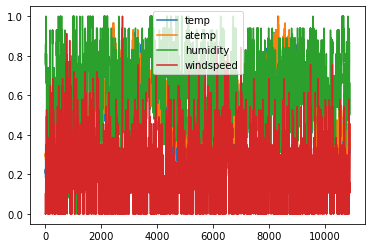

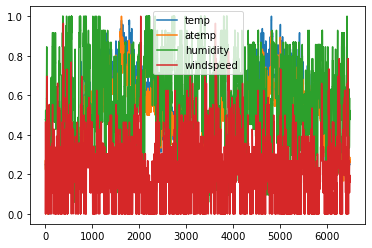

In [84]:
# 최소최대 정규화
def minmax_normalize(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

# 수치형 데이터 temp, atemp, humidity, windspeed 정규화 column 추가
X_train_minstandized = X_train.copy()
X_train_standized = X_train_standized.apply(minmax_normalize)
X_test_standized = X_test.copy()
X_test_standized = X_test_standized.apply(minmax_normalize)

# 정규화 확인
X_train_standized[['temp', 'atemp', 'humidity', 'windspeed']].plot()
X_test_standized[['temp', 'atemp', 'humidity', 'windspeed']].plot()

### 선형 회귀

In [85]:
# 선형 회귀 모델 생성
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 선형 회귀 학습
model.fit(X_train_standized, y_train)
predictions = model.predict(X_test_standized)

# kaggle 제출용 template
submission = pd.read_csv('./data/bike_sharing_demand/sampleSubmission.csv')
submission['count'] = predictions

# kaggle 제출용 csv 저장
submission.to_csv('./data/bike_sharing_demand/linear-regression_2.csv', index=False)

#### kaggle 제출 결과

![image.png](./images/linear-regression_2.png)

여전히 결과에 음수가 있어서 오류가 난다.

# 최종 결과
성능이 가장 잘 되었던 경우 및 실험 결과

|순서|모델|kaggle 제출 점수|
|----|----|----|
|1|랜덤포레스트 기본|0.42031|
|2|kNN 기본|0.87218|
|3|선형 회귀 기본|에러|
|4|랜덤포레스트 z-표준화|0.42338|
|5|kNN z-표준화|0.93893|
|6|선형 회귀 z-표준화|에러|
|7|랜덤포레스트 그리드 서치|0.43414|
|8|kNN 그리드 서치|0.93767|
|9|linear-regression min-max 정규화|에러|


가장 좋은 결과는 랜덤포레스트로 아무 변화를 주지 않았을 때 얻을 수 있었다.

그리드 서치를 하면 그래도 조금은 나아질 것으로 기대했는데 나아지지 않았다. 기본적으로 scikit learn에서 제공하는 모델이 최적화가 잘 되어 있는 것으로 생각된다.
